In [1]:
import xarray as xr
import numpy as np

from data_processor import DataProcessor
from regressor import Regressor

In [ ]:
ds = xr.open_dataset("../data.grib")
t2m_numpy = ds.t2m.to_numpy() - 273.15  # -> C
sp_numpy = ds.sp.to_numpy() / 100       # -> hPa

data = np.stack((t2m_numpy, sp_numpy), axis=-1)
feature_list = [ds.t2m.name, ds.sp.name]

# s -> AUTOREG_SEQUENCE_LENGTH (input_size)
# fh -> FORECASTING_HORIZON
# (X1,X2,...,Xs) -> (Ys+1,Ys+2,...,Ys+fh)
s = 6           
fh = 3

processor = DataProcessor(data)
X, y = processor.preprocess(s, fh)
X_train, X_test, y_train, y_test = processor.train_test_split(X, y)

In [4]:
X.shape, y.shape

((1072, 6, 25, 45, 2), (1072, 3, 25, 45, 2))

<=== linear ===>
RMSE t2m: 2.31; R2 t2m: 0.199
RMSE sp: 3.039; R2 sp: 0.973


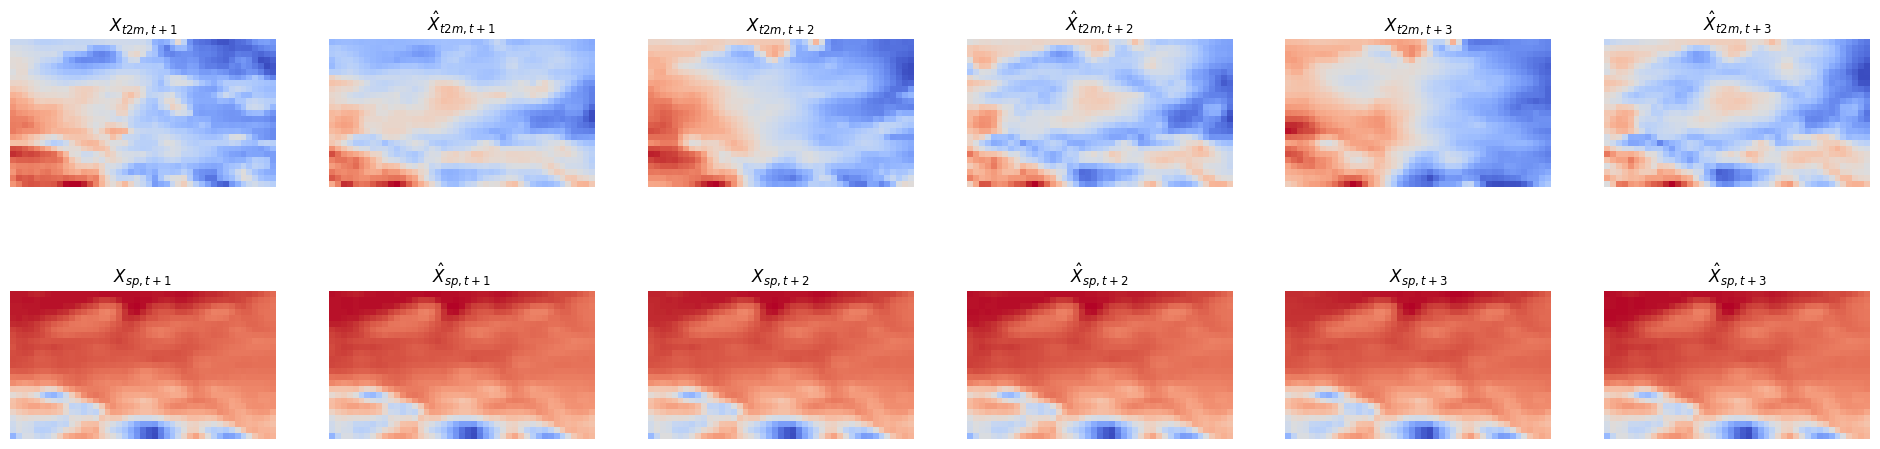

RMSE t2m: 2.059; R2 t2m: 0.703
RMSE sp: 4.487; R2 sp: 0.94


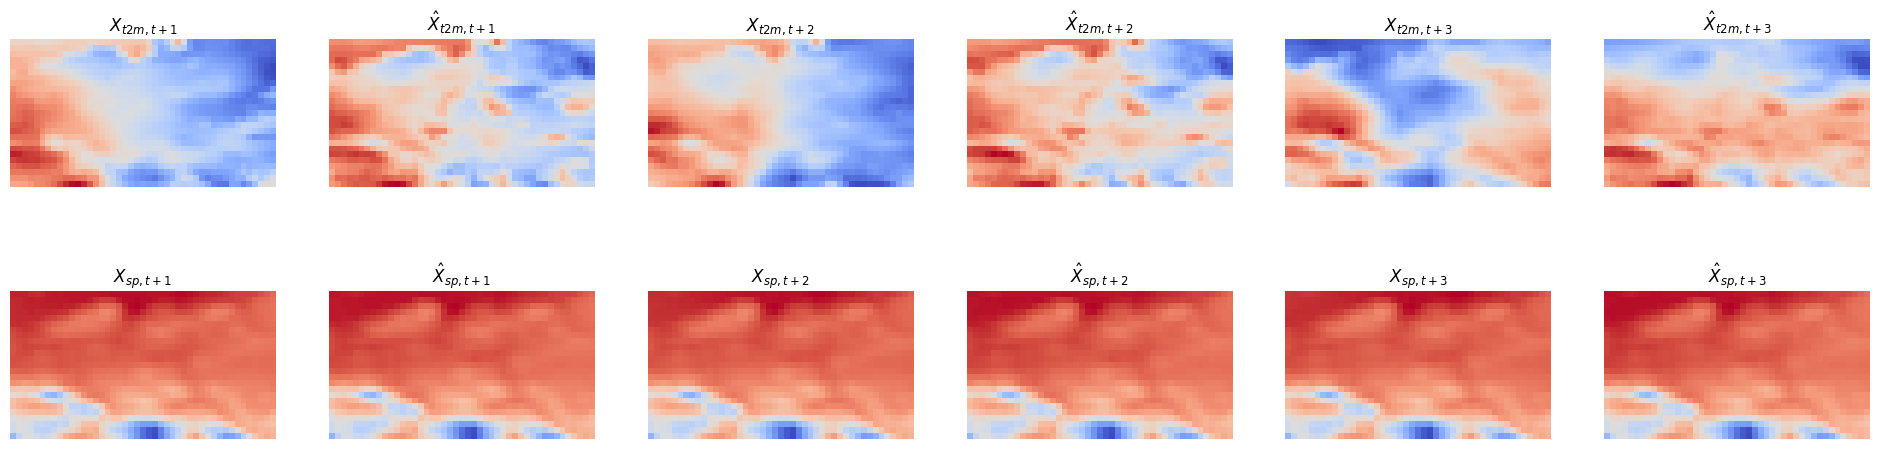

RMSE t2m: 2.262; R2 t2m: 0.785
RMSE sp: 3.755; R2 sp: 0.957


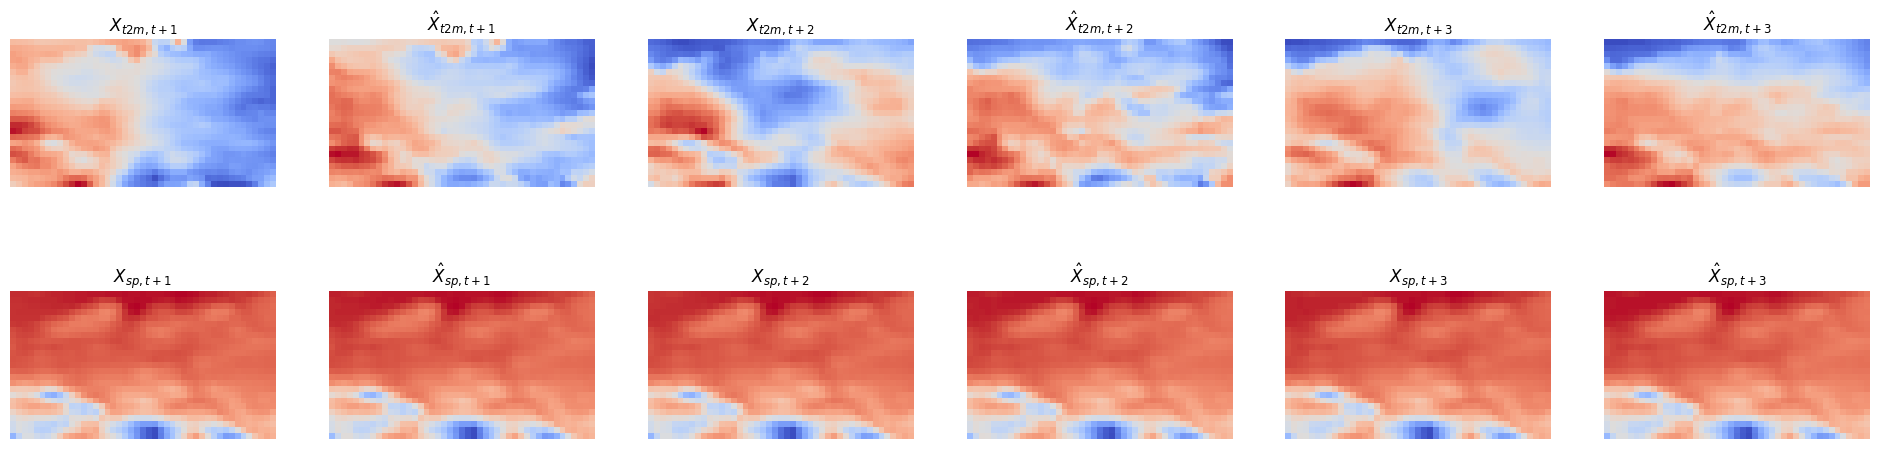

Evaluation metrics for entire test set:
RMSE t2m: 2.8440121088454937; R2 t2m: 0.5270494980581057
RMSE sp: 2.906553473156657; R2 sp: 0.9789346887302581






In [5]:
available_regressors = ["linear"] #, "ridge", "lasso", "elastic_net"]

for reg in available_regressors:
    print(f'<=== {reg} ===>')
    linearreg = Regressor(X.shape, fh, feature_list, regressor_type=reg)
    linearreg.train(X_train, y_train)
    _ = linearreg.predict_and_evaluate(X_test, y_test, limit=3)
    print('\n\n\n')